In [1]:
pip install pandas-datareader


Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data

In [3]:
start = '2011-01-01'
end = '2021-12-31'

df =  data.DataReader('AAPL', 'yahoo', start,end)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-12-31,11.552857,11.475357,11.533929,11.520000,193508000.0,9.819855
2011-01-03,11.795000,11.601429,11.630000,11.770357,445138400.0,10.033264
2011-01-04,11.875000,11.719643,11.872857,11.831786,309080800.0,10.085629
2011-01-05,11.940714,11.767857,11.769643,11.928571,255519600.0,10.168129
2011-01-06,11.973214,11.889286,11.954286,11.918929,300428800.0,10.159906


In [4]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-12-27,180.419998,177.070007,177.089996,180.330002,74919600.0,179.289459
2021-12-28,181.330002,178.529999,180.160004,179.289993,79144300.0,178.255447
2021-12-29,180.630005,178.139999,179.330002,179.380005,62348900.0,178.344925
2021-12-30,180.570007,178.089996,179.470001,178.199997,59773000.0,177.171738
2021-12-31,179.229996,177.259995,178.089996,177.570007,64062300.0,176.545380


In [5]:
df = df.reset_index()
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2010-12-31,11.552857,11.475357,11.533929,11.520000,193508000.0,9.819855
1,2011-01-03,11.795000,11.601429,11.630000,11.770357,445138400.0,10.033264
2,2011-01-04,11.875000,11.719643,11.872857,11.831786,309080800.0,10.085629
3,2011-01-05,11.940714,11.767857,11.769643,11.928571,255519600.0,10.168129
4,2011-01-06,11.973214,11.889286,11.954286,11.918929,300428800.0,10.159906


In [6]:
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()

,High,Low,Open,Close,Volume
0,11.552857,11.475357,11.533929,11.520000,193508000.0
1,11.795000,11.601429,11.630000,11.770357,445138400.0
2,11.875000,11.719643,11.872857,11.831786,309080800.0
3,11.940714,11.767857,11.769643,11.928571,255519600.0
4,11.973214,11.889286,11.954286,11.918929,300428800.0


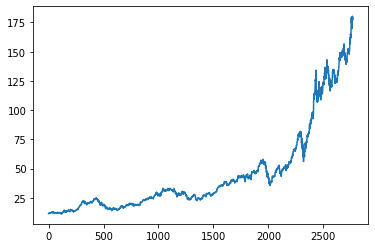

In [7]:
plt.plot(df.Close)

In [8]:
df

,High,Low,Open,Close,Volume
0,11.552857,11.475357,11.533929,11.520000,193508000.0
1,11.795000,11.601429,11.630000,11.770357,445138400.0
2,11.875000,11.719643,11.872857,11.831786,309080800.0
3,11.940714,11.767857,11.769643,11.928571,255519600.0
4,11.973214,11.889286,11.954286,11.918929,300428800.0
...,...,...,...,...,...
2765,180.419998,177.070007,177.089996,180.330002,74919600.0
2766,181.330002,178.529999,180.160004,179.289993,79144300.0
2767,180.630005,178.139999,179.330002,179.380005,62348900.0
2768,180.570007,178.089996,179.470001,178.199997,59773000.0


In [9]:
ma100 = df.Close.rolling(100).mean()
ma100

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
2765    153.3444
2766    153.6667
2767    153.9991
2768    154.3202
2769    154.6399
Name: Close, Length: 2770, dtype: float64

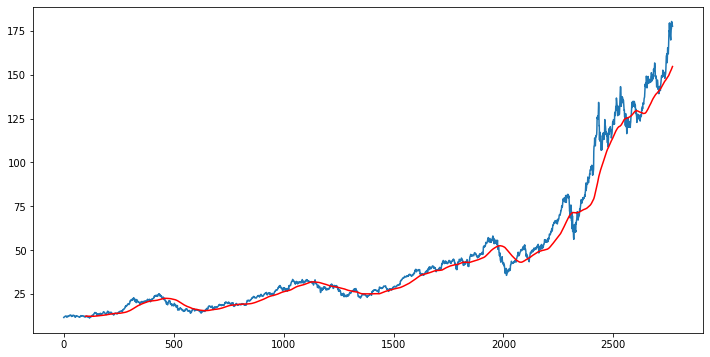

In [10]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')

In [11]:
ma200 = df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2765    142.85570
2766    143.13220
2767    143.40125
2768    143.66845
2769    143.95365
Name: Close, Length: 2770, dtype: float64

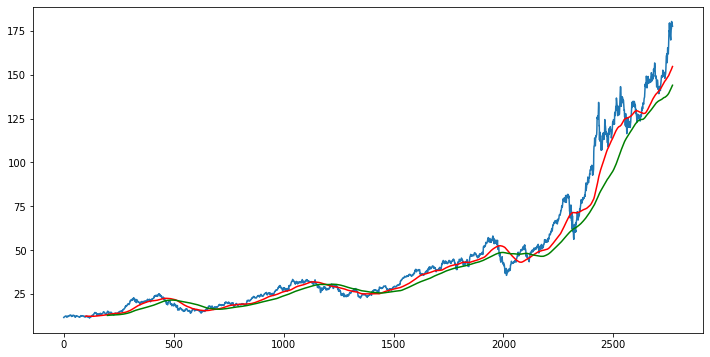

In [12]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [13]:
df.shape

(2770, 5)

In [14]:
#Spiltting Data into Training and Testing

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(1938, 1)
(832, 1)


In [15]:
data_training.head()

,Close
0,11.520000
1,11.770357
2,11.831786
3,11.928571
4,11.918929


In [16]:
data_testing.head()

,Close
1938,56.602501
1939,55.959999
1940,54.470001
1941,54.560001
1942,54.592499


In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [18]:
data_training_array =  scaler.fit_transform(data_training)
data_training_array

array([[0.00564215],
       [0.01110504],
       [0.01244545],
       ...,
       [0.94528523],
       [0.97539747],
       [0.96023227]])

In [19]:
data_training_array.shape

(1938, 1)

In [20]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])
    
x_train, y_train = np.array(x_train), np.array(y_train)

In [21]:
#ML Model

In [22]:
pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [23]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [24]:
pip install tensorflow-datasets

Note: you may need to restart the kernel to use updated packages.


In [25]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
import tensorflow_datasets as tfds

In [26]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [27]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu' , return_sequences = True,
              input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu' , return_sequences = True,
              input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu' , return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu' ))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [29]:
model.compile(optimizer = 'adam' , loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
58/58 [==============================] - 35s 431ms/step - loss: 0.0309
Epoch 2/50
58/58 [==============================] - 21s 360ms/step - loss: 0.0066
Epoch 3/50
58/58 [==============================] - 21s 358ms/step - loss: 0.0053
Epoch 4/50
58/58 [==============================] - 24s 412ms/step - loss: 0.0053
Epoch 5/50
58/58 [==============================] - 25s 438ms/step - loss: 0.0052
Epoch 6/50
58/58 [==============================] - 30s 520ms/step - loss: 0.0044
Epoch 7/50
58/58 [==============================] - 19s 326ms/step - loss: 0.0040
Epoch 8/50
58/58 [==============================] - 22s 386ms/step - loss: 0.0050
Epoch 9/50
58/58 [==============================] - 19s 321ms/step - loss: 0.0044
Epoch 10/50
58/58 [==============================] - 20s 345ms/step - loss: 0.0039
Epoch 11/50
58/58 [==============================] - 22s 373ms/step - loss: 0.0034
Epoch 12/50
58/58 [==============================] - 23s 393ms/step - loss: 0.0035
Epoch 13/50
5

In [30]:
model.save('keras_model.h5')

In [31]:
data_training.head()

,Close
0,11.520000
1,11.770357
2,11.831786
3,11.928571
4,11.918929


In [32]:
past_100_days = data_training.tail(100)

In [33]:
final_df =  past_100_days.append(data_testing, ignore_index = True)

C:\Users\anjuv\AppData\Local\Temp\ipykernel_36184\2006332164.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df =  past_100_days.append(data_testing, ignore_index = True)


In [34]:
final_df.head()

,Close
0,41.310001
1,40.735001
2,40.912498
3,41.055000
4,40.580002


In [35]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.03980109],
       [0.03582961],
       [0.03705557],
       [0.03803982],
       [0.03475904],
       [0.0398356 ],
       [0.04646626],
       [0.05936492],
       [0.05991746],
       [0.07190095],
       [0.0741975 ],
       [0.07573429],
       [0.0779963 ],
       [0.08262392],
       [0.08012017],
       [0.0793604 ],
       [0.07640771],
       [0.0794122 ],
       [0.07735742],
       [0.07618323],
       [0.07846252],
       [0.07765096],
       [0.07972303],
       [0.0793604 ],
       [0.08010291],
       [0.07892872],
       [0.07823804],
       [0.07715019],
       [0.08296929],
       [0.08571478],
       [0.08827033],
       [0.08942723],
       [0.08852935],
       [0.08549029],
       [0.08467873],
       [0.0864918 ],
       [0.08376357],
       [0.08393625],
       [0.08055185],
       [0.08037919],
       [0.07511267],
       [0.07651131],
       [0.07471553],
       [0.07378308],
       [0.06903458],
       [0.07293697],
       [0.07247078],
       [0.074

In [36]:
input_data.shape

(932, 1)

In [37]:
x_test = []
y_test =[]

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])

In [38]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(832, 100, 1)
(832,)


In [39]:
#Making Predictions

y_predicted = model.predict(x_test)

In [40]:
y_predicted.shape

(832, 1)

In [41]:
y_test

array([0.14542503, 0.14098733, 0.13069605, 0.13131767, 0.13154213,
       0.1344085 , 0.13031616, 0.13572081, 0.13813824, 0.13508192,
       0.142904  , 0.14426813, 0.14689274, 0.15038074, 0.15519832,
       0.14815327, 0.14176435, 0.14086647, 0.14621932, 0.12807141,
       0.12477336, 0.1380001 , 0.12979814, 0.13806916, 0.13641151,
       0.12748433, 0.13316526, 0.13547906, 0.13907066, 0.12587846,
       0.13401136, 0.12796781, 0.1209573 , 0.12278763, 0.13238823,
       0.13819004, 0.11273806, 0.10256763, 0.10633191, 0.11700308,
       0.11448207, 0.10754062, 0.08975531, 0.08640546, 0.07702934,
       0.08498955, 0.08865021, 0.07540621, 0.06007286, 0.05972752,
       0.0519745 , 0.05599778, 0.05534164, 0.06691071, 0.06451056,
       0.06283563, 0.07361042, 0.05957212, 0.05617046, 0.04541295,
       0.04732962, 0.04565469, 0.04646626, 0.04966069, 0.04021548,
       0.03755633, 0.04123427, 0.03228981, 0.0252793 , 0.01474625,
       0.00801202, 0.02586638, 0.02410511, 0.02424325, 0.02685

In [42]:
y_predicted

array([[0.18204606],
       [0.18261763],
       [0.1830099 ],
       [0.18319765],
       [0.18315889],
       [0.18289316],
       [0.18243149],
       [0.18180943],
       [0.18110308],
       [0.1804049 ],
       [0.1797683 ],
       [0.17927724],
       [0.17900155],
       [0.17899525],
       [0.17929803],
       [0.17993504],
       [0.18085372],
       [0.1819167 ],
       [0.18297815],
       [0.18396176],
       [0.18470314],
       [0.18505228],
       [0.18501906],
       [0.18461595],
       [0.18394402],
       [0.18312155],
       [0.18218918],
       [0.18121058],
       [0.18026233],
       [0.1794321 ],
       [0.17869103],
       [0.17804551],
       [0.17746355],
       [0.1768654 ],
       [0.17620128],
       [0.17551887],
       [0.1749248 ],
       [0.17433617],
       [0.1735864 ],
       [0.17257151],
       [0.17133726],
       [0.16996571],
       [0.168501  ],
       [0.16687395],
       [0.16501585],
       [0.16287412],
       [0.1604855 ],
       [0.157

In [43]:
scaler.scale_

array([0.00690691])

In [44]:
scale_factor = 1/0.00690691
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

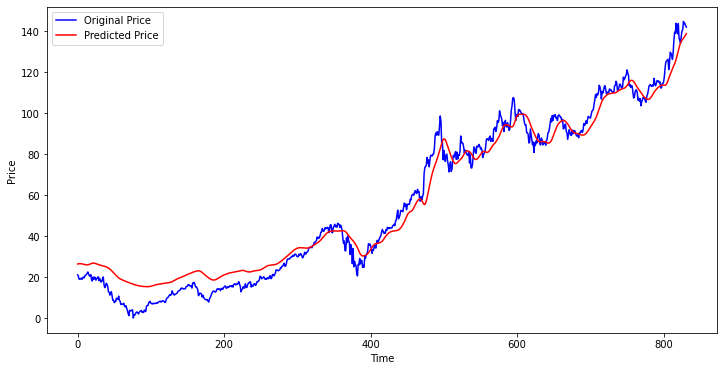

In [45]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_predicted, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()